<a href="https://colab.research.google.com/github/Logesh7-R/DATA_SCIENCE_AI_DEEP_LEARNING/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
df1 = pd.read_csv("Churn_Modelling.csv")
df1.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
866,867,15808017,Cary,545,France,Male,38,1,88293.13,2,1,1,24302.95,0
6570,6571,15790958,Sanders,685,Spain,Male,38,4,0.00,2,1,1,35884.91,0
6129,6130,15727605,Shih,533,Germany,Male,43,4,80442.06,2,0,1,12537.42,0
8674,8675,15719426,Cole,529,France,Male,67,8,103101.56,2,1,1,154002.02,1
5516,5517,15569878,Dale,592,France,Male,37,3,96651.03,1,1,1,3232.82,0


In [10]:
df1['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df1.corr()

ValueError: could not convert string to float: 'Hargrave'

In [12]:
df1.shape

(10000, 14)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

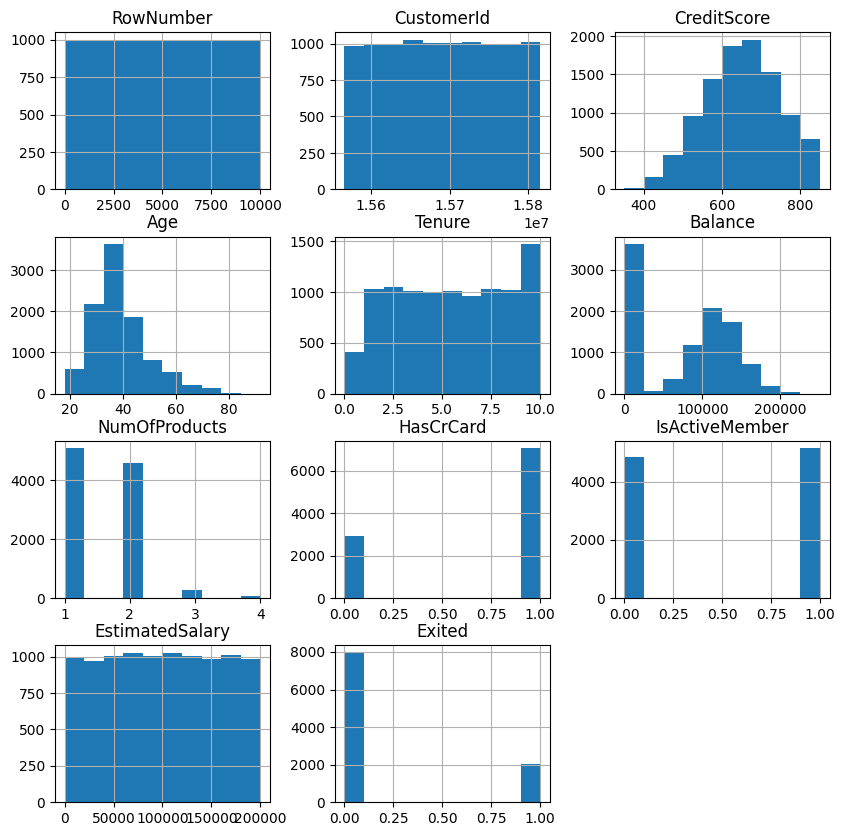

In [15]:
df1.hist(figsize=(10,10))

In [16]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df = df1.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [18]:
df.shape

(10000, 11)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [21]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [22]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [23]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [24]:
enc = LabelEncoder()
x[:,2]= enc.fit_transform(x[:,2])

In [25]:
x.shape

(10000, 10)

In [26]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [27]:
x_tr , x_test ,y_tr , y_test = train_test_split(x,y,random_state=66,test_size=0.2)

In [28]:
std = StandardScaler()
x_tr = std.fit_transform(x_tr)
x_test = std.transform(x_test)

In [29]:
x_tr.ndim

2

In [30]:
model = Sequential()
model.add(Dense(12,input_shape =(12,),activation='leaky_relu'))

model.add(Dense(6,activation='leaky_relu'))
model.add(Dense(3,activation='leaky_relu'))
model.add(Dense(1,activation='sigmoid'))



In [31]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
early = EarlyStopping(patience=5)
callbacks = [early]

In [33]:
history = model.fit(x_tr , y_tr , batch_size= 50 , epochs = 50 , validation_split=0.2, callbacks=[callbacks])
#history = model.fit(x_tr , y_tr , batch_size= 50 , epochs = 50 , validation_split=0.2)

Epoch 1/50
128/128 [==============================] - 2s 8ms/step - loss: 0.7740 - accuracy: 0.4181 - val_loss: 0.6584 - val_accuracy: 0.7462
Epoch 2/50
128/128 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.8008 - val_loss: 0.6029 - val_accuracy: 0.7850
Epoch 3/50
128/128 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.8059 - val_loss: 0.5304 - val_accuracy: 0.7856
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.8103 - val_loss: 0.4756 - val_accuracy: 0.7894
Epoch 5/50
128/128 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.8105 - val_loss: 0.4552 - val_accuracy: 0.7969
Epoch 6/50
128/128 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8163 - val_loss: 0.4454 - val_accuracy: 0.8012
Epoch 7/50
128/128 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.8197 - val_loss: 0.4382 - val_accuracy: 0.8119
Epoch 

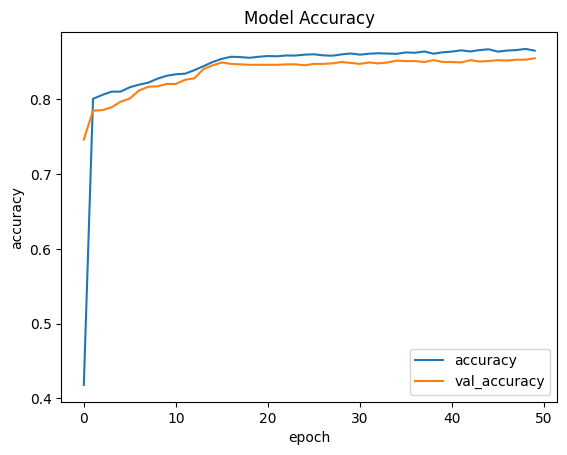

In [34]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()



In [35]:
print(model.predict(std.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.005)

1/1 [==============================] - 0s 163ms/step
[[ True]]


In [36]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1524   61]
 [ 228  187]]


In [38]:
accuracy_score(y_test, y_pred)

0.8555

In [40]:
from predict_customer_churn import predict_churn

# Assuming 'ann' is your trained model and 'sc' is the StandardScaler instance used for your inputs
predict_churn(model, std)

Enter customer details to predict churn:
Geography (France/Spain/Germany): France
Credit Score (350-850): 450
Gender (Male/Female): Male
Age: 25
Tenure (years): 5
Balance: 10000
Number of Products: 4
Has Credit Card (1=Yes, 0=No): 1
Is Active Member (1=Yes, 0=No): 1
Estimated Salary: 100000
1/1 [==============================] - 0s 24ms/step
The model predicts the customer will churn.
